=== 총점 상위 5명 ===
    name  math  eng  sci  total        avg grade
1    학생2    88   96   95    279  93.000000     A
5    학생6    98   98   67    263  87.666667     B
29  학생30    74   93   94    261  87.000000     B
11  학생12    95   85   77    257  85.666667     B
19  학생20    97   76   84    257  85.666667     B

=== 과목별 통계 ===
            math        eng         sci
count  30.000000  30.000000   30.000000
mean   80.966667  77.066667   78.200000
std    11.009348  12.555898   10.867224
min    61.000000  61.000000   60.000000
25%    74.000000  66.000000   69.250000
50%    81.500000  76.500000   76.500000
75%    87.750000  86.500000   84.000000
max    99.000000  99.000000  100.000000


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/

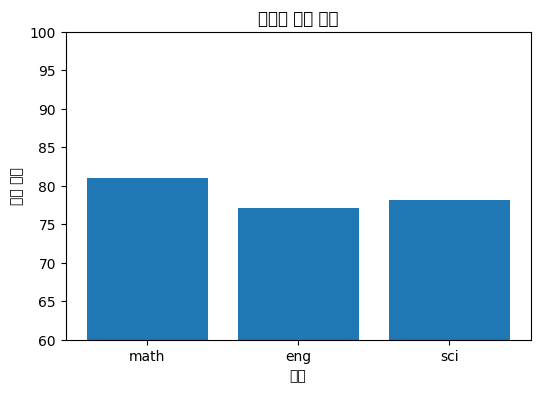

/tmp/ipython-input-4014728495.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dfScores["math"], dfScores["eng"], dfScores["sci"]],
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missin

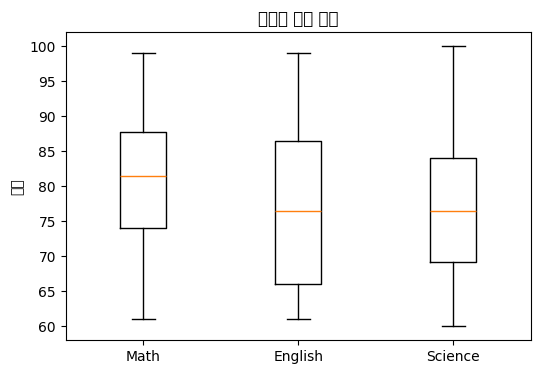

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


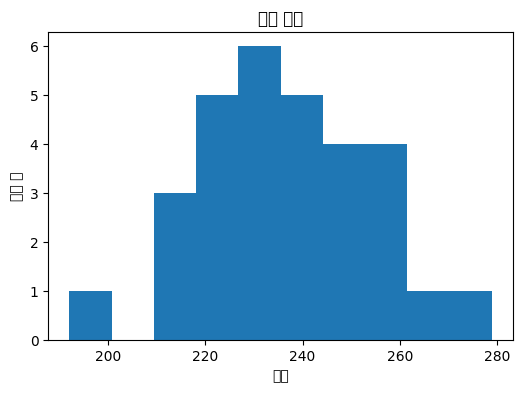


분석 결과가 student_scores_analysis.csv 파일로 저장되었습니다.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 생성

np.random.seed(42)

studentCount = 30
studentNames = [f"학생{num}" for num in range(1, studentCount + 1)]

mathScores = np.random.randint(60, 101, size=studentCount)
engScores = np.random.randint(60, 101, size=studentCount)
sciScores = np.random.randint(60, 101, size=studentCount)

dfScores = pd.DataFrame({
    "name": studentNames,
    "math": mathScores,
    "eng": engScores,
    "sci": sciScores
})

# 2. 총점 / 평균 / 등급 계산

dfScores["total"] = dfScores["math"] + dfScores["eng"] + dfScores["sci"]
dfScores["avg"] = dfScores["total"] / 3

def getGrade(avg):
    if avg >= 90:
        return "A"
    elif avg >= 80:
        return "B"
    elif avg >= 70:
        return "C"
    elif avg >= 60:
        return "D"
    else:
        return "F"

dfScores["grade"] = dfScores["avg"].apply(getGrade)

# 3. 상위 5명 출력

print("=== 총점 상위 5명 ===")
print(dfScores.sort_values("total", ascending=False).head(5))

# 4. 과목별 통계 분석

stats = dfScores[["math", "eng", "sci"]].describe()
print("\n=== 과목별 통계 ===")
print(stats)

# 5. 과목별 평균 막대그래프

subjectMeans = dfScores[["math", "eng", "sci"]].mean()

plt.figure(figsize=(6, 4))
plt.bar(subjectMeans.index, subjectMeans.values)
plt.title("과목별 평균 점수")
plt.xlabel("과목")
plt.ylabel("평균 점수")
plt.ylim(60, 100)
plt.show()

# 6. 과목별 점수 분포 (Boxplot)

plt.figure(figsize=(6, 4))
plt.boxplot([dfScores["math"], dfScores["eng"], dfScores["sci"]],
            labels=["Math", "English", "Science"])
plt.title("과목별 점수 분포")
plt.ylabel("점수")
plt.show()

# 7. 총점 분포 히스토그램

plt.figure(figsize=(6, 4))
plt.hist(dfScores["total"], bins=10)
plt.title("총점 분포")
plt.xlabel("총점")
plt.ylabel("학생 수")
plt.show()

# 8. 결과 CSV 저장

dfScores.to_csv("student_scores_analysis.csv", index=False)
print("\n분석 결과가 student_scores_analysis.csv 파일로 저장되었습니다.")